In [2]:
##1.Import python packages

In [3]:
import pandas as pd
import numpy as np
import os
file_path='C:/Business_Data_Analysis/data/'

In [6]:
#get data from source database
df_retail=pd.read_sql_table('retail',engine_datahub)
df_retail.shape

(134, 10)

In [7]:
#drop duplicate
df_retail.drop_duplicates(keep='first', inplace=True)
df_retail

,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
0,2021,1,Pantene,7.99,No,0%,"8,630","68,954","33,571","8,460"
1,2021,2,Pantene,7.29,Yes,10%,"10,183","74,234","32,484","9,983"
2,2021,3,Pantene,5.49,Yes,30%,"21,568","118,408","29,980","17,117"
3,2021,4,Pantene,7.49,Yes,5%,"9,309","69,724","31,558","9,038"
4,2021,5,Pantene,7.99,No,0%,"8,462","67,611","32,917","8,379"
...,...,...,...,...,...,...,...,...,...,...
129,2022,11,Aussie,4.29,Yes,15%,"14,757","63,308","22,239","12,315"
130,2022,12,Aussie,4.99,No,0%,"10,873","54,256","23,812","10,556"
131,2022,13,Aussie,4.49,Yes,10%,"12,630","56,709","21,340","11,254"
132,2022,14,Aussie,4.99,No,0%,"10,767","53,727","23,580","10,556"


In [8]:
#Check data
df_retail.shape

(134, 10)

In [9]:
df_retail.info

<bound method DataFrame.info of      Year  week number  Product  Price On Flyer? Discount   Units  Sales $  \
0    2021            1  Pantene   7.99        No       0%   8,630   68,954   
1    2021            2  Pantene   7.29       Yes      10%  10,183   74,234   
2    2021            3  Pantene   5.49       Yes      30%  21,568  118,408   
3    2021            4  Pantene   7.49       Yes       5%   9,309   69,724   
4    2021            5  Pantene   7.99        No       0%   8,462   67,611   
..    ...          ...      ...    ...       ...      ...     ...      ...   
129  2022           11   Aussie   4.29       Yes      15%  14,757   63,308   
130  2022           12   Aussie   4.99        No       0%  10,873   54,256   
131  2022           13   Aussie   4.49       Yes      10%  12,630   56,709   
132  2022           14   Aussie   4.99        No       0%  10,767   53,727   
133  2022           15   Aussie   4.79       Yes       5%  11,529   55,224   

    Gross Margin $ # Transactio

In [10]:
#Export updated historical data to database
df_retail.to_sql("retail", engine_datahub,if_exists='replace',index=False)

In [11]:
#Q1.What price point is most effective at maximizing sales?
# Import libraries
#We need to import libraries for three reasons: manipulating data, building the model, and visualizing the functions.
#We are importing numpy and pandas for creating and manipulating table, mtplotlib and seaborn for visualization and statsmodels API to build and run the regression model.
from dateutil.parser import parse
import itertools
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
%matplotlib inline
import statsmodels.api as sm
plt.rcParams.update({'figure.figsize':(10,7),'figure.dpi':120})

In [12]:
#2. Defining the revenue function
#We know that revenue depends on the quantity sold and the unit price of products.
#We also know that profit is calculated by netting out costs from revenue.
#Putting these two together we get the following equations:
## revised profit function revenue = quantity * price - cost # eq (3)
#Eq #3 tells us that we need three pieces of information to calculate profit: quantity, price and cost.

In [13]:
df_retail.head()

,Year,week number,Product,Price,On Flyer?,Discount,Units,Sales $,Gross Margin $,# Transactions that contained the product
0,2021,1,Pantene,7.99,No,0%,"8,630","68,954","33,571","8,460"
1,2021,2,Pantene,7.29,Yes,10%,"10,183","74,234","32,484","9,983"
2,2021,3,Pantene,5.49,Yes,30%,"21,568","118,408","29,980","17,117"
3,2021,4,Pantene,7.49,Yes,5%,"9,309","69,724","31,558","9,038"
4,2021,5,Pantene,7.99,No,0%,"8,462","67,611","32,917","8,379"


In [14]:
#Check Datatype
print(df.dtypes)

Year                                           int64
week number                                    int64
Product                                       object
Price                                        float64
On Flyer?                                     object
Discount                                      object
Units                                         object
Sales $                                       object
Gross Margin $                                object
# Transactions that contained the product     object
dtype: object


In [15]:
#conver data type for culumns from object to float data type
import pandas as pd
df['Units'] = df['Units'].astype(str).str.replace(',', '')
df['Sales $'] = df['Sales $'].astype(str).str.replace(',', '')
df['Discount'] = df['Discount'].astype(str).str.replace('%', '')
df['Gross Margin $'] = df['Gross Margin $'].astype(str).str.replace(',', '')
df['# Transactions that contained the product'] = df['# Transactions that contained the product'].astype(str).str.replace(',', '')
df['Units'] = df['Units'].astype(float)
df['Sales $'] = df['Sales $'].astype(float)
df['Discount'] = df['Discount'].astype(float) /100.0
df['Gross Margin $'] = df['Gross Margin $'].astype(float)
df['# Transactions that contained the product'] = df['# Transactions that contained the product'].astype(float)
print(df.dtypes)

Year                                           int64
week number                                    int64
Product                                       object
Price                                        float64
On Flyer?                                     object
Discount                                     float64
Units                                        float64
Sales $                                      float64
Gross Margin $                               float64
# Transactions that contained the product    float64
dtype: object


In [16]:
### Check out missing values:
df.isnull().sum()

Year                                         0
week number                                  0
Product                                      0
Price                                        0
On Flyer?                                    0
Discount                                     0
Units                                        0
Sales $                                      0
Gross Margin $                               0
# Transactions that contained the product    0
dtype: int64

In [17]:
3.Q1.What price point is most effective at maximizing sales?
df1=df[['Price','Sales $']]
df1=df1.loc[df['Sales $'].idxmax()]
print(df1)

Object `sales` not found.
Price           3.99
Sales $    232605.00
Name: 11, dtype: float64


In [18]:
# Q2.What price point is most effective at maximizing gross margin?
df2=df[['Price','Gross Margin $']]
df2=df2.loc[df['Gross Margin $'].idxmax()]
print(df2)

Price                 6.79
Gross Margin $    35632.00
Name: 34, dtype: float64


In [19]:
#Q3.Is Shampoo seasonal (influenced by time of year)? Explain why or why not.
#combine year and week number to 'date'
df['formatted_date'] = df['Year'] * 1000 + df['week number'] * 10 + 0
df['date'] = pd.to_datetime(df['formatted_date'], format='%Y%W%w')
print(df.dtypes)
print (df)

Year                                                  int64
week number                                           int64
Product                                              object
Price                                               float64
On Flyer?                                            object
Discount                                            float64
Units                                               float64
Sales $                                             float64
Gross Margin $                                      float64
# Transactions that contained the product           float64
formatted_date                                        int64
date                                         datetime64[ns]
dtype: object
     Year  week number  Product  Price On Flyer?  Discount    Units   Sales $  \
0    2021            1  Pantene   7.99        No      0.00   8630.0   68954.0   
1    2021            2  Pantene   7.29       Yes      0.10  10183.0   74234.0   
2    2021            3 

In [20]:
df3=df[['date','Sales $']]
df3= df3.groupby(['date'])['Sales $'].sum().reset_index()
df3.head()

,date,Sales $
0,2021-01-10,123744.0
1,2021-01-17,168039.0
2,2021-01-24,289089.0
3,2021-01-31,125587.0
4,2021-02-07,159612.0


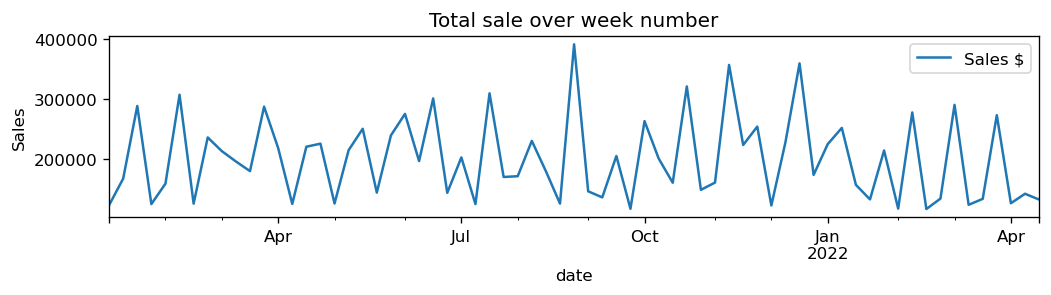

In [21]:
#plot df3
df3.plot(x='date', y='Sales $',figsize=(10, 2))
plt.xlabel('date')
plt.ylabel('Sales')
plt.title('Total sale over week number')
plt.show()

In [22]:
df3=df[['date','Sales $']]
df3['date'] = pd.to_datetime(df3['date'])
df3= df3.set_index('date')
df3= df3.groupby(['date'])['Sales $'].sum().reset_index()
print(df3.head())
print(df3.info())

        date   Sales $
0 2021-01-10  123744.0
1 2021-01-17  168039.0
2 2021-01-24  289089.0
3 2021-01-31  125587.0
4 2021-02-07  159612.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     67 non-null     datetime64[ns]
 1   Sales $  67 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 KB
None


C:\Users\Po\AppData\Local\Temp/ipykernel_10508/3094531813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['date'] = pd.to_datetime(df3['date'])


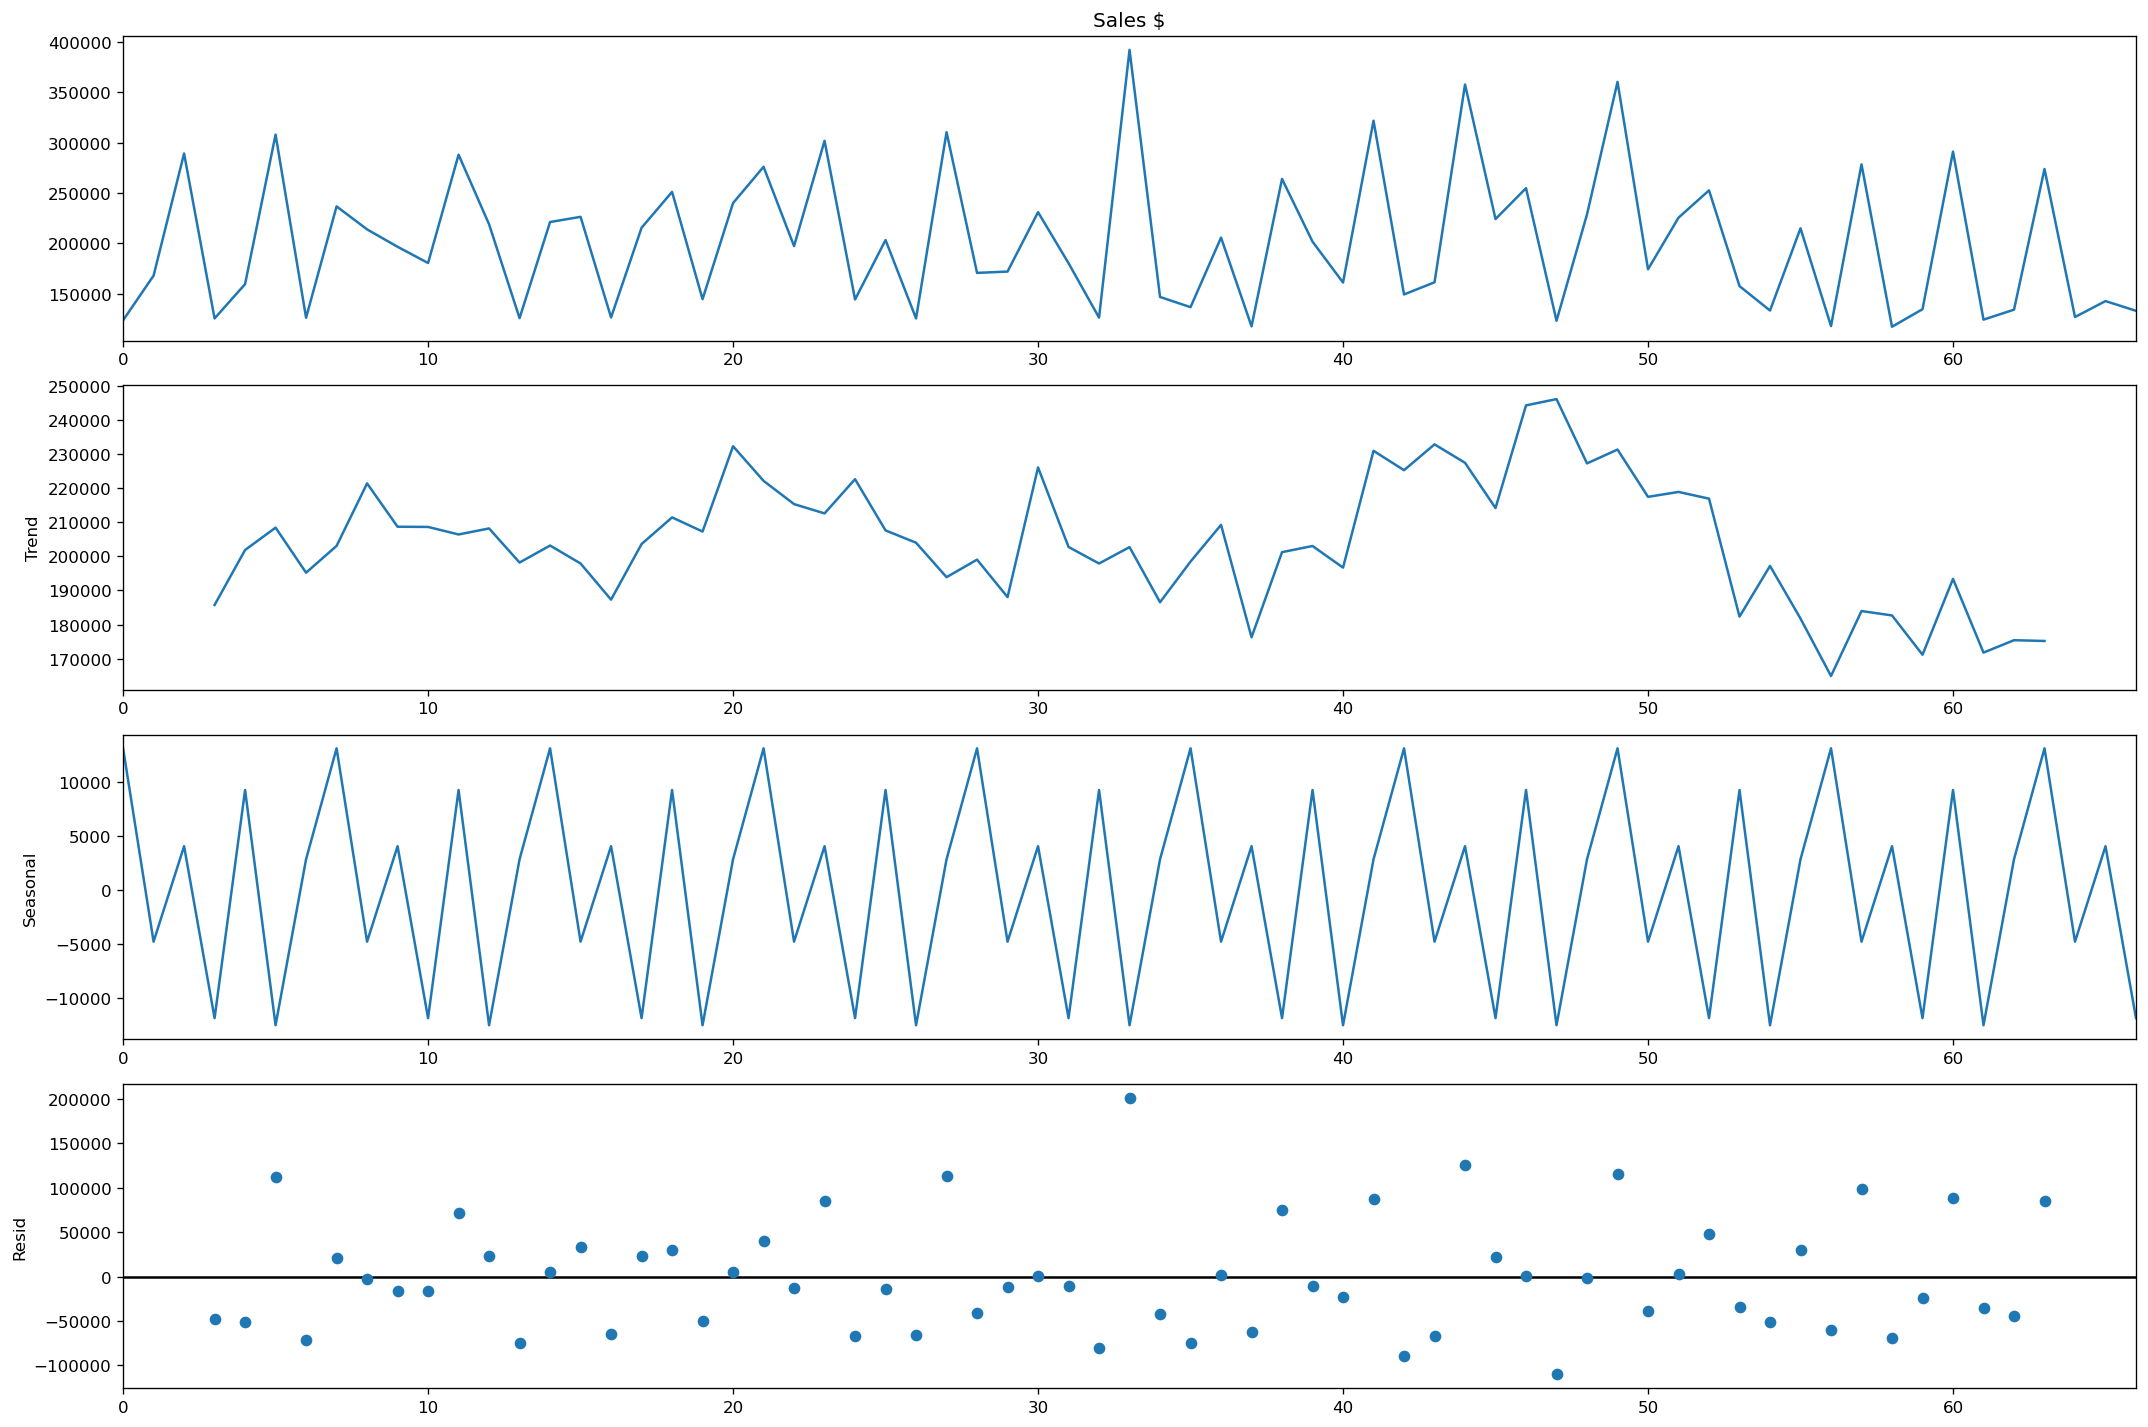

In [23]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,12
#statsmodels.api-->sm---sm.tsa.seasonal_decompose
decomposition = sm.tsa.seasonal_decompose(df3['Sales $'], model='additive',period=7)
fig = decomposition.plot()
plt.show()

In [26]:
#Q4.vWhat is the cost per unit of each product?
df4=df[['Product','Units', 'Sales $','Gross Margin $']]
df4=df4.groupby('Product').agg(totalunits=('Units', 'sum'),totalsales=('Sales $', 'sum'),totalmargin=('Gross Margin $', 'sum'))
df4['totalCOGS']=df4['totalsales']-df4['totalmargin']
df4['Cost/Unit']=df4['totalCOGS']/df4['totalunits']
print(df4)

         totalunits  totalsales  totalmargin  totalCOGS  Cost/Unit
Product                                                           
Aussie    1662917.0   6143529.0    1488673.0  4654856.0   2.799211
Pantene   1348783.0   7321343.0    1791330.0  5530013.0   4.100002


In [27]:
#Q5.How would Pantene perform for units, sales and margin with a 25% discount?
df5=df[['Product','Discount','Units', 'Sales $','Gross Margin $']]
df5=df5.groupby(['Product','Discount',]).agg(totalunits=('Units', 'sum'),totalsales=('Sales $', 'sum'),totalmargin=('Gross Margin $', 'sum'))
df5=df5.sort_values(['Product','Discount'], ascending=(False,True))
df5=df5.iloc[0:10,:]
df5['discount']=[0.00,0.05,0.10,0.15,0.20,0.30,0.35,0.40,0.45,0.50]
print(df5)

                  totalunits  totalsales  totalmargin  discount
Product Discount                                               
Pantene 0.00        241814.0   1932094.0     940654.0      0.00
        0.05         28113.0    210566.0      95303.0      0.05
        0.10         10183.0     74234.0      32484.0      0.10
        0.15         90178.0    612308.0     242578.0      0.15
        0.20         42716.0    277227.0     102091.0      0.20
        0.30        144336.0    792405.0     200628.0      0.30
        0.35         55884.0    295626.0      66502.0      0.35
        0.40        163023.0    780879.0     112487.0      0.40
        0.45        123169.0    553029.0      48035.0      0.45
        0.50        449367.0   1792975.0     -49432.0      0.50


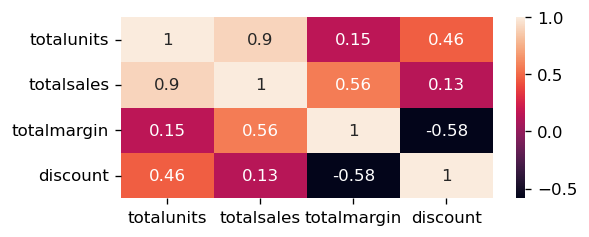

In [29]:
fig, ax = plt.subplots(figsize=(5,2))
ax=(sns.heatmap(df5.corr(), annot=True))

In [30]:
#Run a linear regression on discount price vs. Units
mdl_discount_units= ols('totalunits ~ discount', data=df5).fit()
print(mdl_discount_units.params)
mdl_discount_sales= ols('totalsales ~ discount', data=df5).fit()
print(mdl_discount_sales.params)
mdl_discount_margin= ols('totalmargin ~ discount', data=df5).fit()
print(mdl_discount_sales.params)

Intercept     48080.981818
discount     347189.272727
dtype: float64
Intercept    610497.663636
discount     486546.545455
dtype: float64
Intercept    610497.663636
discount     486546.545455
dtype: float64


In [31]:
Units_25discount=pd.DataFrame({'discount':[0.25]})
mdl_discount_units.predict(Units_25discount)

0    134878.3
dtype: float64

In [32]:
Sales_25discount=pd.DataFrame({'discount':[0.25]})
mdl_discount_sales.predict(Sales_25discount)

0    732134.3
dtype: float64

In [33]:
Margin_25discount=pd.DataFrame({'discount':[0.25]})
mdl_discount_margin.predict(Margin_25discount)

0    179133.0
dtype: float64

In [34]:
#Q5.How would Pantene perform for units, sales and margin with a 60% discount?
Units_60discount=pd.DataFrame({'discount':[0.60]})
mdl_discount_units.predict(Units_60discount)

0    256394.545455
dtype: float64

In [35]:
Sales_60discount=pd.DataFrame({'discount':[0.60]})
mdl_discount_sales.predict(Sales_60discount)

0    902425.590909
dtype: float64

In [36]:
Margin_60discount=pd.DataFrame({'discount':[0.60]})
mdl_discount_margin.predict(Margin_60discount)

0   -148792.054545
dtype: float64

In [37]:
#Q7.What impact does being “On Flyer” have on performance?
df7=df[['On Flyer?','Discount','Units', 'Sales $','Gross Margin $']]
df7=df7.groupby(['On Flyer?']).agg(totalunits=('Units', 'sum'),totalsales=('Sales $', 'sum'),totalmargin=('Gross Margin $', 'sum'))
print(df7)

           totalunits  totalsales  totalmargin
On Flyer?                                     
No           861550.0   4720935.0    1883072.0
Yes         2150150.0   8743937.0    1396931.0


In [38]:
#Performance by Product
df7=df[['Product','On Flyer?','Discount','Units', 'Sales $','Gross Margin $']]
df7=df7.groupby(['Product','On Flyer?']).agg(totalunits=('Units', 'sum'),totalsales=('Sales $', 'sum'),totalmargin=('Gross Margin $', 'sum'))
print(df7)

                   totalunits  totalsales  totalmargin
Product On Flyer?                                     
Aussie  No           534227.0   2341831.0     845996.0
        Yes         1128690.0   3801698.0     642677.0
Pantene No           327323.0   2379104.0    1037076.0
        Yes         1021460.0   4942239.0     754254.0
